# Secondary Protein Analysis

In [2]:
%load_ext autoreload

%autoreload 2

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
file_place = r"C:\Users\Conor\DataSets"

Breast_DF = pd.read_pickle(file_place + r"\Breast_data_raw")

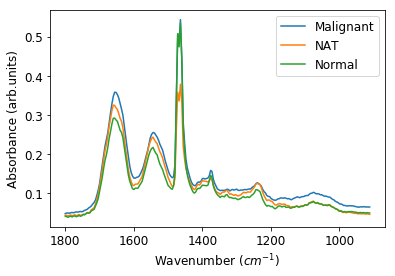

In [108]:
plt.clf()

for name, df in Breast_DF.groupby("Type"):
    
    plt.plot(df.mean(axis = 0), label = name)


plt.legend()
plt.ylabel("Absorbance (arb.units)")
plt.xlabel("Wavenumber $(cm^{-1})$")
plt.gca().invert_xaxis()
plt.show()

In [101]:
from sklearn.preprocessing import Normalizer, MinMaxScaler
import Tissue_Analysis_Tools as TAT

PCA_NR_Components = 50

dataframe = TAT.process_data(Breast_DF, paraffin = (1340,1490), balance = "Grade")

PCA_reduced = TAT.clean_spectra(dataframe, PCA_NR_Components)

Normalised_values = Normalizer(norm = "l1").fit_transform(PCA_reduced)

Breast_DF_P = pd.DataFrame(Normalised_values, index = dataframe.index, columns = dataframe.columns)

C:\Users\Conor\AppData\Roaming\Python\Python36\site-packages\pandas\core\frame.py:3930: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


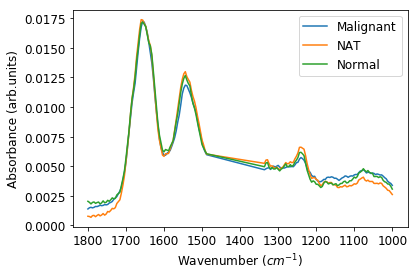

In [107]:
plt.clf()

for name, df in Breast_DF_P.groupby("Type"):
    
    plt.plot(df.mean(axis = 0), label = name)

plt.legend()
plt.ylabel("Absorbance (arb.units)")
plt.xlabel("Wavenumber $(cm^{-1})$")
plt.gca().invert_xaxis()
plt.show()

# Import secondary protein data

In [113]:
import os

Secondary_Proteins = pd.read_pickle(os.path.join(os.getcwd(), "Secondary_Proteins"))

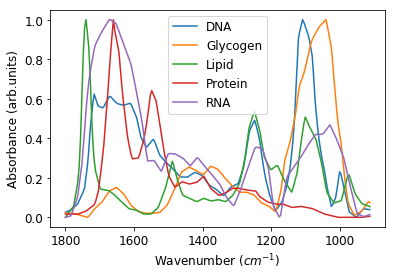

In [114]:
plt.clf()

for name, df in Secondary_Proteins.groupby(level = "level_0"):
    
    plt.plot(df.mean(axis = 0), label = name)

plt.legend()
plt.ylabel("Absorbance (arb.units)")
plt.xlabel("Wavenumber $(cm^{-1})$")
plt.gca().invert_xaxis()
plt.show()

In [120]:
Secondary_Proteins.shape

(5, 223)

In [125]:
import pickle

file_place = os.path.join(os.getcwd(), "Secondary_Proteins.pickle")

Secondary_Structures = pickle.load(open(file_place, "rb"))

C:\Users\Conor\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: ResourceWarning: unclosed file <_io.BufferedReader name='C:\\Users\\Conor\\Documents\\Projects\\Biospec_Analysis\\Secondary_Proteins.pickle'>
  """


EOFError: Ran out of input

In [119]:
Breast_Secondary_Proteins = pd.DataFrame(np.matmul(Breast_DF_P.values, Secondary_Proteins.values.T)
                                         , index = Breast_DF_P.index, columns = Secondary_Proteins.index)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 223 is different from 164)

In [116]:
Breast_Secondary_Proteins.head()

level_0                                                                   DNA  \
Sex Type      Stage Pathology                 Grade Label Age Core              
F   Malignant IIa   Invasive ductal carcinoma 1     Blood 40  B4    13.540849   
                                                              B4    13.489242   
                                                              B4    13.351511   
                                                              B4    13.140900   
                                                              B4    12.901650   

level_0                                                             Glycogen  \
Sex Type      Stage Pathology                 Grade Label Age Core             
F   Malignant IIa   Invasive ductal carcinoma 1     Blood 40  B4    6.816599   
                                                              B4    6.798136   
                                                              B4    6.753043   
                                                              B4    6.690148   
                                                              B4    6.638885   

level_0                                                                Lipid  \
Sex Type      Stage Pathology                 Grade Label Age Core             
F   Malignant IIa   Invasive ductal carcinoma 1     Blood 40  B4    6.531941   
                                                              B4    6.483808   
                                                              B4    6.346985   
                                                              B4    6.138659   
                                                              B4    5.900336   

level_0                                                               Protein  \
Sex Type      Stage Pathology                 Grade Label Age Core              
F   Malignant IIa   Invasive ductal carcinoma 1     Blood 40  B4    11.275783   
                                                              B4    11.255181   
                                                              B4    11.200053   
                                                              B4    11.107951   
                                                              B4    10.993039   

level_0                                                                   RNA  
Sex Type      Stage Pathology                 Grade Label Age Core             
F   Malignant IIa   Invasive ductal carcinoma 1     Blood 40  B4    16.901487  
                                                              B4    16.831931  
                                                              B4    16.643574  
                                                              B4    16.347970  
                                                              B4    16.002366

# LDA

In [30]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [80]:
LDA_df = pd.DataFrame(LinearDiscriminantAnalysis(n_components = 1).fit_transform(Breast_Secondary_Proteins.values,
                                                                    Breast_Secondary_Proteins.reset_index()["Grade"]), index = Breast_Secondary_Proteins.index)

C:\Users\Conor\AppData\Roaming\Python\Python36\site-packages\matplotlib\font_manager.py:1241: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


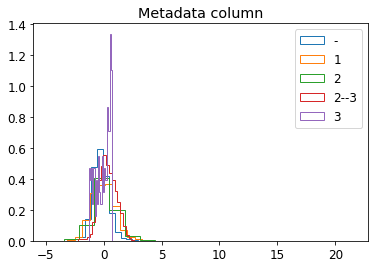

In [117]:
plt.clf()
plt.title("Metadata column")

for name, df in LDA_df.groupby(level = "Grade"):
    
    sample = df.values.reshape(-1,1)
    
    plt.hist(sample, label = name, histtype = "step", bins  = 20, density = True)
    
    #plt.scatter(sample[0], sample[1], label = name, alpha = 0.5, s  = 2)
    
plt.legend()
plt.show()

<Figure size 432x288 with 0 Axes>

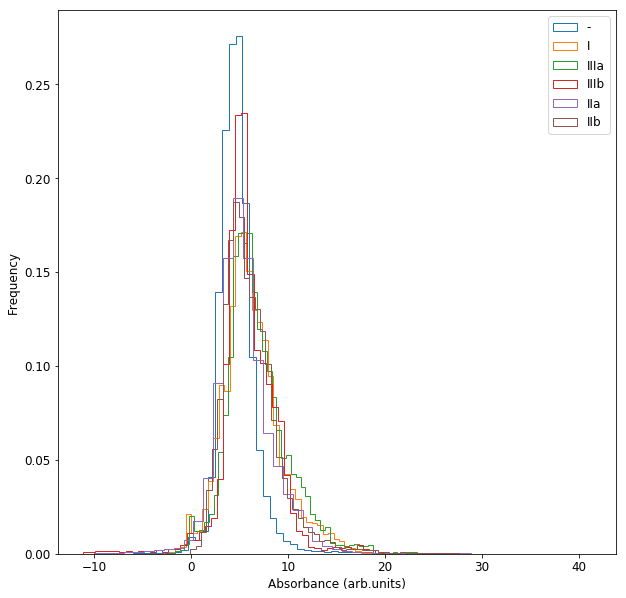

In [118]:
plt.clf()
fig = plt.figure(figsize = (10,10))
fig.patch.set_facecolor([1,1,1])

Category = "Stage"
Macro_Chem = "Glycogen"

for name, df in Breast_Secondary_Proteins.groupby(Category):
    
    plt.hist(df[Macro_Chem], label = name, histtype = "step", density = True, bins = 50)
    #plt.scatter(df["RNA"], df["Protein"], label = name, s  = 2)

plt.xlabel("Absorbance (arb.units)")
plt.ylabel("Frequency")

plt.legend()
plt.show()

In [10]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

C:\Users\Conor\Anaconda3\lib\importlib\_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
C:\Users\Conor\Anaconda3\lib\importlib\_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
C:\Users\Conor\Anaconda3\lib\importlib\_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
C:\Users\Conor\Anaconda3\lib\importlib\_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
C:\Users\Conor\Anaconda3\lib\site-packages\scipy\_lib\_numpy_compat.py:10: DeprecationWarning: Importing from numpy.testing.nosetester is deprecated since 1.15.0, import from numpy.testing instead.
  from numpy.testing.nosetester import import_

In [11]:
import os
from scipy.io import loadmat

file_place = r"C:\Users\Conor\Desktop\Breast Cancer Data\br20832_cores\br20832_cores"
file_list = os.listdir(file_place)

image_list_directory = r"C:\Users\Conor\Desktop\Breast Cancer Data\overlay\overlay"
image_list = os.listdir(image_list_directory)

images = {file_name[:-4] : loadmat(os.path.join(file_place, file_name)) for file_name in file_list[:3]}

C:\Users\Conor\Anaconda3\lib\importlib\_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)


In [12]:
images.keys()

dict_keys(['A1', 'A10', 'A11'])

In [13]:
from sklearn.decomposition import PCA

C:\Users\Conor\Anaconda3\lib\importlib\_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)


In [14]:
image = images["A11"]["image"]

In [15]:
pca = PCA(n_components = 1).fit(image.reshape(-1, image.shape[-1]))#.reshape(image.shape[0], image.shape[1], 3)

In [16]:
pca.explained_variance_ratio_.sum()

0.8771081752909715

In [26]:
new_image = pca.transform(image.reshape(-1, image.shape[-1])).reshape(image.shape[0], image.shape[1], -3)

In [27]:
new_image.shape

(313, 313, 1)

In [25]:
plt.clf()

plt.imshow(new_image)

plt.show()

TypeError: Invalid dimensions for image data